In [1]:
import pandas as pd 

df = pd.read_excel("British Airways Summer Schedule Dataset - Forage Data Science Task 1.xlsx")


In [2]:
df.shape

(10000, 17)

In [3]:
df.describe()

,FLIGHT_DATE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2025-07-14 07:04:04.800000,1.547200,25.073800,198.385900,0.607700,7.951900,30.421400
min,2025-04-01 00:00:00,0.000000,0.000000,160.000000,0.000000,0.000000,0.000000
25%,2025-05-22 00:00:00,0.000000,8.000000,167.000000,0.000000,4.000000,20.000000
50%,2025-07-13 00:00:00,0.000000,17.000000,175.000000,0.000000,8.000000,30.000000
75%,2025-09-06 00:00:00,0.000000,35.000000,180.000000,1.000000,11.000000,41.000000
max,2025-10-30 00:00:00,14.000000,97.000000,358.000000,20.000000,29.000000,92.000000
std,NaN,3.625395,22.142348,53.653478,1.006232,5.130752,15.284233


In [4]:
def ClearNullsAndDuplicates(df):
	print(f"Number of duplicated rows: {df.duplicated().value_counts()}")
	df = df.drop_duplicates()
	print(f"Number nulls: {df.isnull().value_counts()}")
	df = df.dropna()
	
	return df

df2=ClearNullsAndDuplicates(df)

Number of duplicated rows: False    10000
Name: count, dtype: int64
Number nulls: FLIGHT_DATE  FLIGHT_TIME  TIME_OF_DAY  AIRLINE_CD  FLIGHT_NO  DEPARTURE_STATION_CD  ARRIVAL_STATION_CD  ARRIVAL_COUNTRY  ARRIVAL_REGION  HAUL   AIRCRAFT_TYPE  FIRST_CLASS_SEATS  BUSINESS_CLASS_SEATS  ECONOMY_SEATS  TIER1_ELIGIBLE_PAX  TIER2_ELIGIBLE_PAX  TIER3_ELIGIBLE_PAX
False        False        False        False       False      False                 False               False            False           False  False          False              False                 False          False               False               False                 10000
Name: count, dtype: int64


In [5]:
# Convert FLIGHT_TIME from string to datetime.time format and combine with FLIGHT_DATE
df2['FLIGHT_TIME'] = pd.to_datetime(df2['FLIGHT_DATE'].astype(str) + ' ' + df2['FLIGHT_TIME'].astype(str))
# Drop the original FLIGHT_DATE column
df2 = df2.drop('FLIGHT_DATE', axis=1)

Since all flights depart from LHR and the Airline is British Airways, we decided to drop these two columns for dimensionality reduction.

In [6]:
df2 = df2.drop(columns={'AIRLINE_CD','DEPARTURE_STATION_CD'}, axis=1)

In [7]:
import matplotlib.pyplot as plt

# Count unique flight numbers
unique_flights = df2['FLIGHT_NO'].nunique()
print(f"Total records: {len(df2)}")
print(f"Unique flight numbers: {unique_flights}")

# Get duplicate flight numbers
duplicate_flights = df2[df2['FLIGHT_NO'].duplicated(keep=False)].sort_values('FLIGHT_NO')
print(f"\nNumber of flights with duplicate flight numbers: {len(duplicate_flights)}")

# Display first few rows of duplicate flights
print("\nSample of duplicate flights:")
display(duplicate_flights.head(10))

# Optional: Count frequency of each flight number
flight_frequency = df2['FLIGHT_NO'].value_counts()
print("\nTop 10 most frequent flight numbers:")
print(flight_frequency.head(10))

Total records: 10000
Unique flight numbers: 6037

Number of flights with duplicate flight numbers: 6689

Sample of duplicate flights:


,FLIGHT_TIME,TIME_OF_DAY,FLIGHT_NO,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX
983,2025-07-21 08:38:00,Morning,BA1003,CDG,France,Europe,SHORT,A320,0,6,174,0,8,30
9973,2025-08-17 12:59:00,Lunchtime,BA1003,MAD,Spain,Europe,SHORT,A320,0,2,178,0,11,40
3986,2025-10-29 06:49:00,Morning,BA1010,DXB,UAE,Middle East,LONG,B777,8,49,178,2,11,39
2464,2025-09-08 21:02:00,Evening,BA1010,LAX,USA,North America,LONG,A350,0,56,275,2,13,44
5219,2025-06-10 13:01:00,Lunchtime,BA1011,FRA,Germany,Europe,SHORT,A320,0,17,163,0,1,12
6073,2025-06-05 06:40:00,Morning,BA1011,HND,Japan,Asia,LONG,B787,0,31,173,0,10,37
4324,2025-06-09 12:33:00,Lunchtime,BA1011,DFW,USA,North America,LONG,A350,0,56,275,0,4,18
1306,2025-07-29 15:24:00,Afternoon,BA1015,DFW,USA,North America,LONG,A380,14,97,358,1,8,31
355,2025-10-11 19:42:00,Evening,BA1015,CDG,France,Europe,SHORT,A320,0,15,165,1,2,15
3601,2025-06-05 08:47:00,Morning,BA1019,BCN,Spain,Europe,SHORT,A320,0,15,165,0,4,19



Top 10 most frequent flight numbers:
FLIGHT_NO
BA5934    7
BA8347    7
BA5015    6
BA5953    6
BA7919    6
BA7761    6
BA6477    6
BA9541    5
BA4358    5
BA1690    5
Name: count, dtype: int64


The seat counts (FIRST_CLASS_SEATS, etc.) set the upper limit of possible passengers in each class. However, lounge eligibility depends on more than just seat availability—it’s tied to passenger status (e.g., loyalty tier, travel class) and specific access rules (e.g., First Class customers or BA Gold Members).

TIERX_ELIGIBLE_PAX is derived from who actually qualifies based on those rules, not just the seat counts. For example, a flight with 10 First Class seats might have only 5 TIER1-eligible pax if not all passengers are First Class customers or premier cardholders.
Correlation could exist because higher seat counts in premium classes (e.g., First or Business) might increase the likelihood of eligible pax for Tiers 1 or 2. However, the exact number of eligible pax depends on booking data or passenger profiles, which aren’t directly captured by seat counts alone.

## Notes on Flight Numbers in the Dataset

- ✈️ The same **flight number** can appear multiple times in the dataset with different dates (`FLIGHT_TIME`), since airlines often reuse the same flight number for repeated scheduled services.  
  - Example: `BA1003` could be a daily London → Paris flight.  

- 🗓️ **Flight number + date** together uniquely identify a **specific journey instance**.  

- 🔢 By itself, `FLIGHT_NO` tells you the **service pattern** (which route, operated by which airline), but **not the exact day/time** — that comes from `FLIGHT_TIME`.


In [8]:
# import pandas as pd

# # Merge into a new column
# df2.insert(3, "ARRIVAL_STATION_COUNTRY", df2["ARRIVAL_STATION_CD"] + " - " + df2["ARRIVAL_COUNTRY"])

# df2.drop(columns={"ARRIVAL_STATION_CD","ARRIVAL_COUNTRY"},axis=1)


<Figure size 1000x600 with 0 Axes>

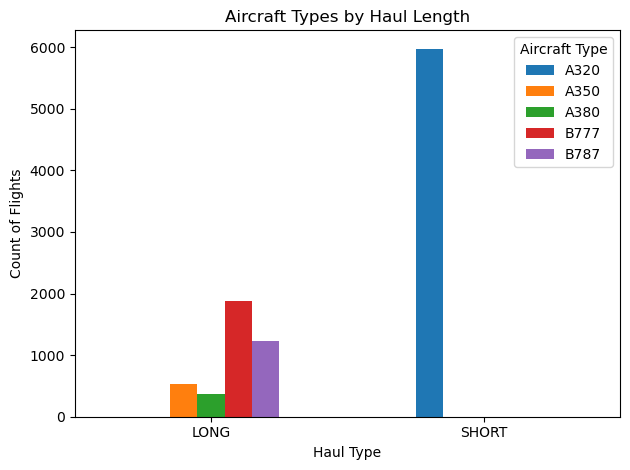

In [9]:
import seaborn as sns

# Create a cross-tabulation of HAUL and AIRCRAFT_TYPE
aircraft_haul_counts = pd.crosstab(df2['HAUL'], df2['AIRCRAFT_TYPE'])

# Create a bar plot
plt.figure(figsize=(10, 6))
aircraft_haul_counts.plot(kind='bar')

# Customize the plot
plt.title('Aircraft Types by Haul Length')
plt.xlabel('Haul Type')
plt.ylabel('Count of Flights')
plt.legend(title='Aircraft Type')
plt.xticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

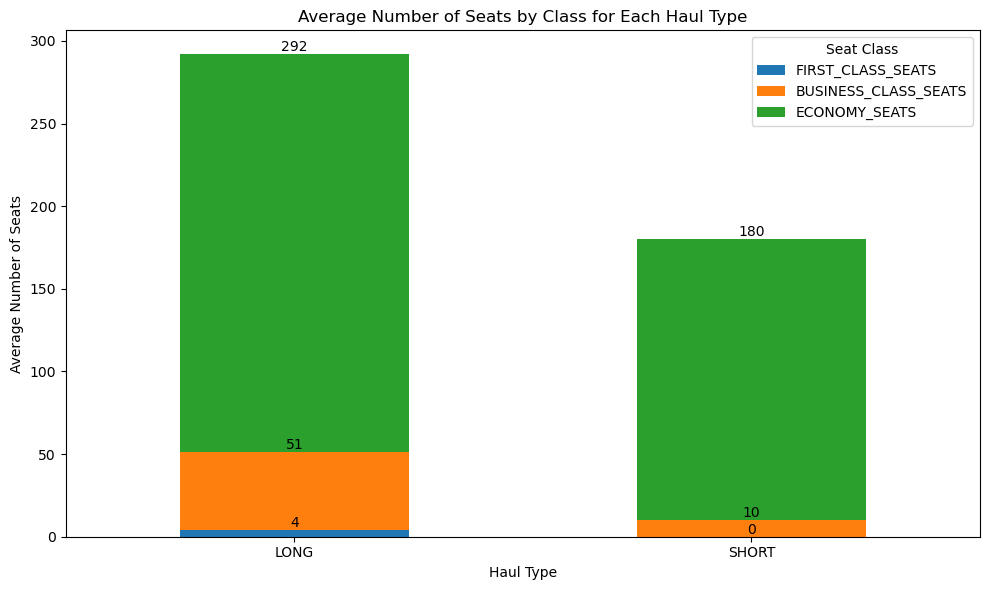

In [10]:
# Calculate average seats by haul type
seats_by_haul = df2.groupby('HAUL')[['FIRST_CLASS_SEATS', 'BUSINESS_CLASS_SEATS', 'ECONOMY_SEATS']].mean()

# Create stacked bar chart
ax = seats_by_haul.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Average Number of Seats by Class for Each Haul Type')
plt.xlabel('Haul Type')
plt.ylabel('Average Number of Seats')
plt.legend(title='Seat Class')
plt.xticks(rotation=0)

# Add value labels on the bars
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f')

plt.tight_layout()